## Señal senoidal

En matemática se denomina **sinusoide** o **senoide** a la curva que representa gráficamente a la función **seno** y también a dicha función en sí. Es una curva que describe una oscilación repetitiva y suave.

Su forma más básica en función del tiempo (t) es:

$$y(t)=A\,\text{sen}(\omega t+\varphi)$$

donde

* $A$ es la amplitud de la oscilación.
* $\omega$ es la velocidad angular, $\omega = 2\pi f$.
* $f$ es la frecuencia de oscilación.
* $\varphi$ es la fase inicial.

A continuación se crea una señal senoidal en Python, usando *comprehension list* para generar y almacenar los puntos de la señal, y considerando parámetros como la **amplitud**, **frecuencia** y **frecuencia de muestreo** de la señal.

Se asume que la **fase inicial** de la señal es 0 y la duración de la señal es 1 segundo.

In [21]:
import math
import matplotlib.pyplot as plt
import numpy as np

def generar_senal_senoidal(A: float, f: float, fs: int
                           )-> tuple[list[float], list[float]]:
    """
    Genera una señal senoidal y almacena sus valores en una lista.
    
    Args:
        A: Amplitud de la señal.
        f: Frecuencia de la señal.
        fs: Frecuencia de muestreo de la señal.
        
    Returns:
        Una 2-tupla con dos listas, la primera con los valores de tiempo y la
        segunda con los valores de la señal senoidal.
    """
    t = [i / fs for i in range(fs + 1)]
    y = [A * math.sin(2 * math.pi * f * ti) for ti in t]
    
    return (t, y)

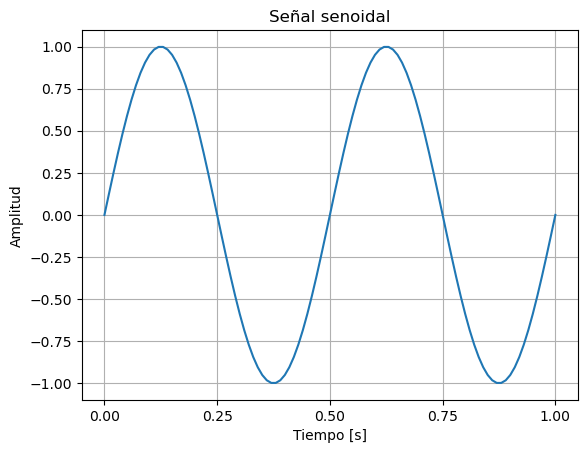

In [22]:
A = 1
f = 2
fs  = 100

t, y_sen = generar_senal_senoidal(A, f, fs)

plt.plot(t, y_sen)
plt.xlabel('Tiempo [s]')
plt.xticks([i / 100 for i in range(0, 101, 25)])
plt.ylabel('Amplitud')
plt.title('Señal senoidal')
plt.grid()
plt.show()

## Suma de señales

Para combinar dos señales senoidales, lo más común es hacer una **suma** de las dos señales en cada instante de tiempo. Cada señal puede ser representada como una función del tiempo, y cuando se combinan, simplemente se suman sus valores en cada punto del tiempo correspondiente.

$$y_f (t) = y_1 (t) + y_2 (t)$$

A continuación se crean dos señales senoidales para luego ser combinadas, generando una nueva señal senoidal. La **amplitud** y la **frecuencia** de la señal pueden ser distintas, sin embargo la **frecuencia de muestreo** debe ser la misma para ambas.

De nuevo, se asume una **fase inicial** igual a 0 y una duración de 1 segundo.

In [23]:
def combinar_senales_senoidales(senal_1: list[float], senal_2: list[float]
                                )-> list[float]:
    """
    Combina dos señales senoidales sumando sus valores.
    
    Args:
        senal_1: Lista con los valores de la primera señal.
        senal_2: Lista con los valores de la segunda señal.
        
    Returns:
        Lista con los valores de la señal resultante.
    """
    return [s1 + s2 for s1, s2 in zip(senal_1, senal_2)]

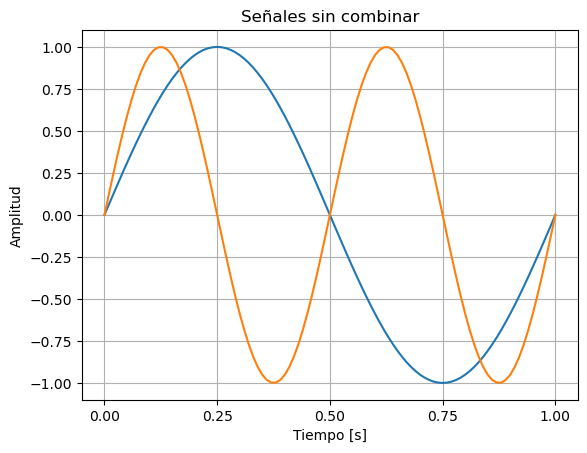

In [24]:
fs = 100

A_1 = 1
f_1 = 1
t_1, y_1 = generar_senal_senoidal(A_1, f_1, fs)

A_2 = 1
f_2 = 2
t_2, y_2 = generar_senal_senoidal(A_2, f_2, fs)

plt.plot(t_1, y_1)
plt.plot(t_2, y_2)
plt.xlabel('Tiempo [s]')
plt.xticks([i / 100 for i in range(0,101, 25)])
plt.ylabel('Amplitud')
plt.title('Señales sin combinar')
plt.grid()
plt.show()

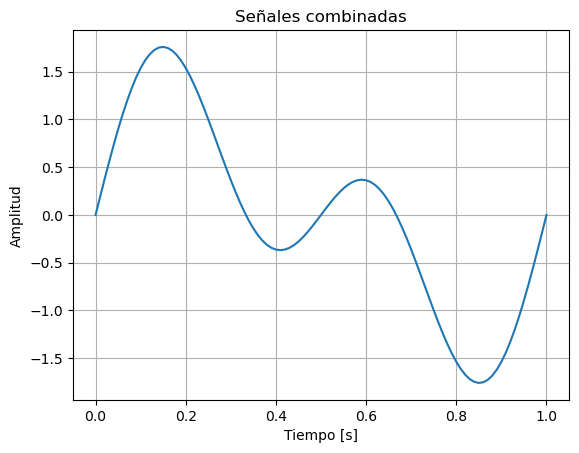

In [25]:
y_comb = combinar_senales_senoidales(y_1, y_2)

plt.plot(t_1, y_comb)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señales combinadas')
plt.grid()
plt.show()

## Señal cuadrada

Las señales cuadradas son un tipo de señal periódica que alterna entre dos niveles de amplitud, caracterizadas por transiciones bruscas entre los valores alto y bajo. En los sistemas digitales, estas señales son fundamentales ya que representan los estados binarios "**alto**" (1) y "**bajo**" (0), utilizados para la transmisión y procesamiento de información.

$$y(t) = \begin{cases} A, & \text{si } A\,\text{sen}(\omega t) \geq 0 \\
-A, & \text{si } A\,{sen}(\omega t) < 0\end{cases}$$

A continuación se crea una señal cuadrada considerando parámetros como la **amplitud**, **frecuencia** y **frecuencia de muestreo** de la señal.

Se asume que la **fase inicial** es 0 y que la señal dura 1 segundo.

In [26]:
def generar_señal_cuadrada(A: float, f: float, fs:int
                           ) -> tuple[list[float], list[float]]:
    """
    Genera una señal cuadrada y almacena sus valores en una lista.
    
    Args:
        A: Amplitud de la señal.
        f: Frecuencia de la señal.
        fs: Frecuencia de muestreo de la señal.
        
    Returns:
        Una 2-tupla con dos listas, la primera con los valores de tiempo y la
        segunda con los valores de la señal cuadrada.
    """
    t = [i / fs for i in range(fs + 1)]
    y = [A if A * math.sin(2 * math.pi * f * ti) >= 0 else -A for ti in t]
    
    return (t, y)

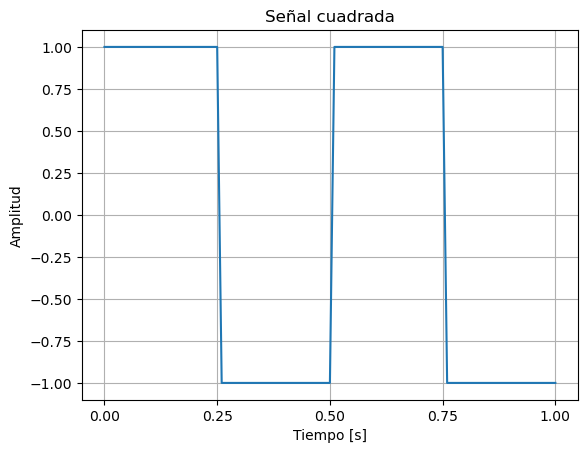

In [27]:
A = 1
f = 2
fs = 100

t, y_cuad = generar_señal_cuadrada(A, f, fs)

plt.plot(t, y_cuad)
plt.xlabel('Tiempo [s]')
plt.xticks([i / 100 for i in range(0, 101, 25)])
plt.ylabel('Amplitud')
plt.title('Señal cuadrada')
plt.grid()
plt.show()

## Señales en el Dominio de Tiempo


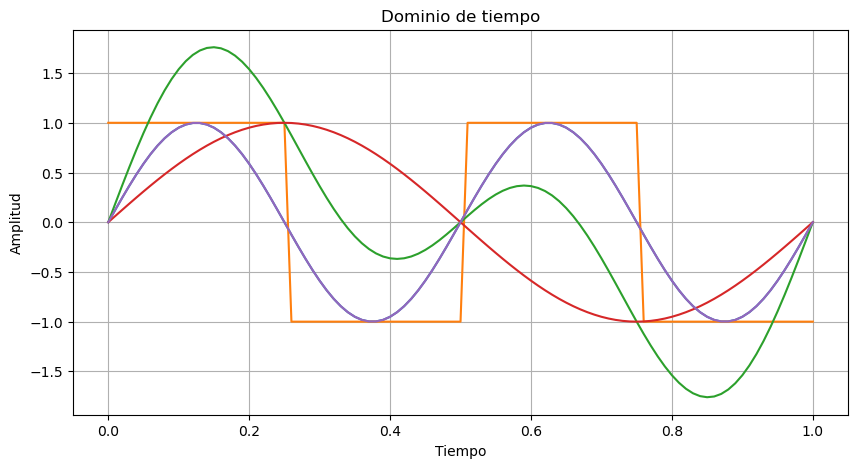

In [29]:


def señales_dominio_tiempo(senoidal, cuadrada, combinada, sen_1, sen_2):
    tiempo = np.linspace(0, 1, 101) 

    plt.figure(figsize=(10, 5))
    plt.plot(tiempo, senoidal)
    plt.plot(tiempo, cuadrada)
    plt.plot(tiempo, combinada)
    plt.plot(tiempo, sen_1)
    plt.plot(tiempo, sen_2)
    plt.title("Dominio de tiempo")
    plt.xlabel("Tiempo")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.show()

señales_dominio_tiempo(y_sen, y_cuad, y_comb, y_1, y_2)



